<a href="https://colab.research.google.com/github/Bhuwan2099/Loan_Data_Analysis_Using_Python/blob/main/loan_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

lets read the file

In [2]:
data=pd.read_csv('loan_data.csv')

Lets see the top data

In [121]:
data.head(3)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,Fully Paid
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,Fully Paid
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,Fully Paid


see the information of the data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


lets seee data is null or not

In [6]:
data.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

see the purpose of generating loans and their values

In [76]:
purposes=data['purpose'].value_counts()
print(purposes)

purpose
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: count, dtype: int64


**plot to visualize **

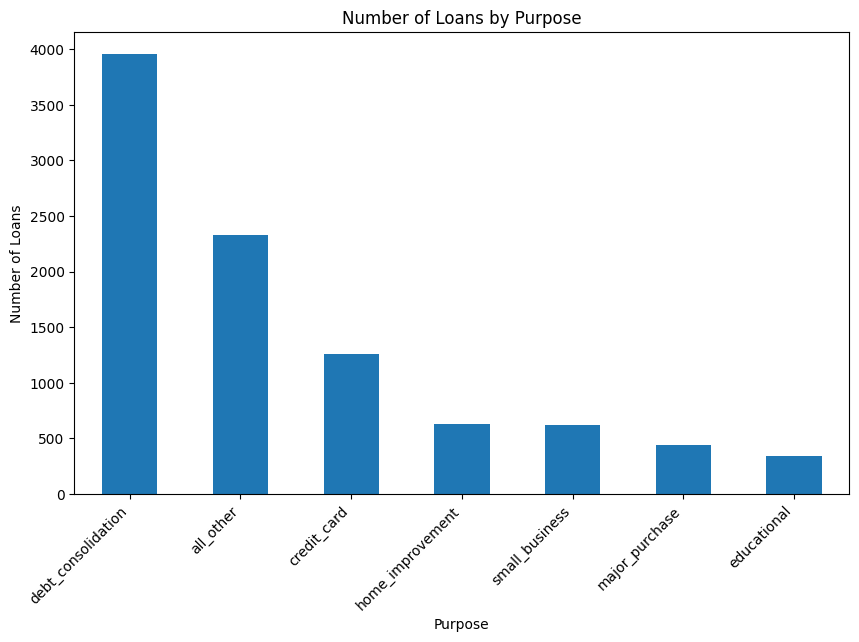

In [131]:
plt.figure(figsize=(10, 6))
purposes.plot(kind='bar')
plt.title('Number of Loans by Purpose')
plt.xlabel('Purpose')
plt.ylabel('Number of Loans')
plt.xticks(rotation=45, ha='right')
plt.show()

In [124]:
check_policy=data['credit.policy'].value_counts()
print(check_policy)

credit.policy
1    7710
0    1868
Name: count, dtype: int64


In [129]:
credit_policy_and_fico_relation = data.groupby("credit.policy")['fico'].mean()
print(f"credit policy and fico relation: {credit_policy_and_fico_relation}")

credit policy and fico relation: credit.policy
0    683.978051
1    717.356031
Name: fico, dtype: float64


IT is clear that the FICO score of the borrower who meet the credit policy is much higher than that of others


The interest rate for small bussiness is significantly higher than other purposes

plot the bar chart

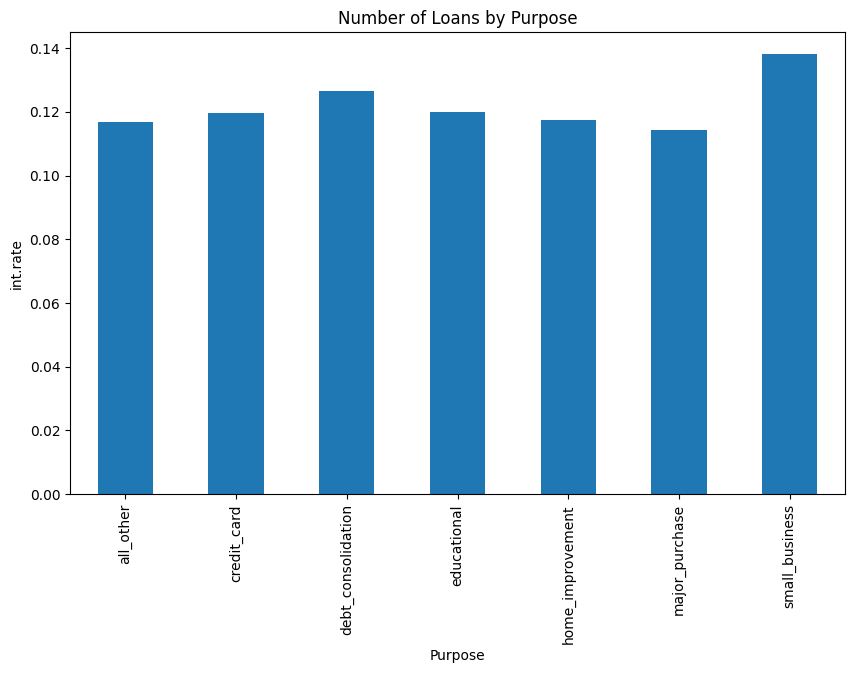

In [82]:
plt.figure(figsize=(10, 6))
avg_int_rate_for_each_purpose.plot(kind='bar')
plt.title('Number of Loans by Purpose')
plt.xlabel('Purpose')
plt.ylabel('int.rate')
plt.show()


number of client who paid the laon in full amount and who did not

In [12]:
data['not.fully.paid'] = data['not.fully.paid'].map({0: 'Fully Paid', 1: 'Not Fully Paid'})
not_fully_paid_or_not=data['not.fully.paid'].value_counts()
print(not_fully_paid_or_not)

not.fully.paid
Fully Paid        8045
Not Fully Paid    1533
Name: count, dtype: int64


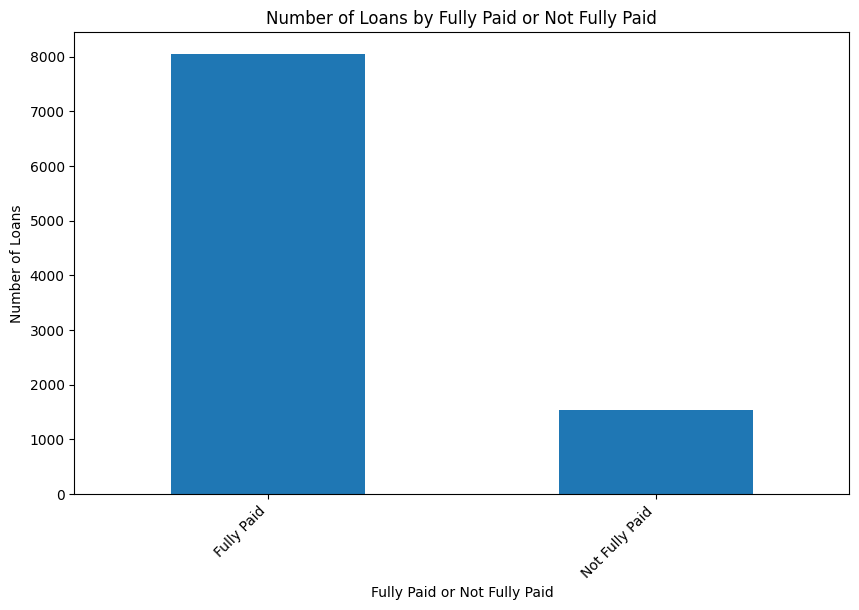

In [13]:


plt.figure(figsize=(10, 6))
not_fully_paid_or_not.plot(kind='bar')
plt.title('Number of Loans by Fully Paid or Not Fully Paid')
plt.xlabel('Fully Paid or Not Fully Paid')
plt.ylabel('Number of Loans')
plt.xticks(rotation=45, ha='right')
plt.show()


purpose wise loan fully paid or not

In [15]:
grouped_data = data.groupby(['purpose', 'not.fully.paid']).size().unstack(fill_value=0)
print(grouped_data)

not.fully.paid      Fully Paid  Not Fully Paid
purpose                                       
all_other                 1944             387
credit_card               1116             146
debt_consolidation        3354             603
educational                274              69
home_improvement           522             107
major_purchase             388              49
small_business             447             172


same in percentile for better distinction

In [133]:


grouped_data_percentage = grouped_data.apply(lambda x: 100 * x / x.sum(), axis=1).round(2)
print(grouped_data_percentage)


not.fully.paid      Fully Paid  Not Fully Paid
purpose                                       
all_other                83.40           16.60
credit_card              88.43           11.57
debt_consolidation       84.76           15.24
educational              79.88           20.12
home_improvement         82.99           17.01
major_purchase           88.79           11.21
small_business           72.21           27.79


Heatmap for the above graph

the above result clearly shows that loan given for small_bussiness is in high risk in comparision to others

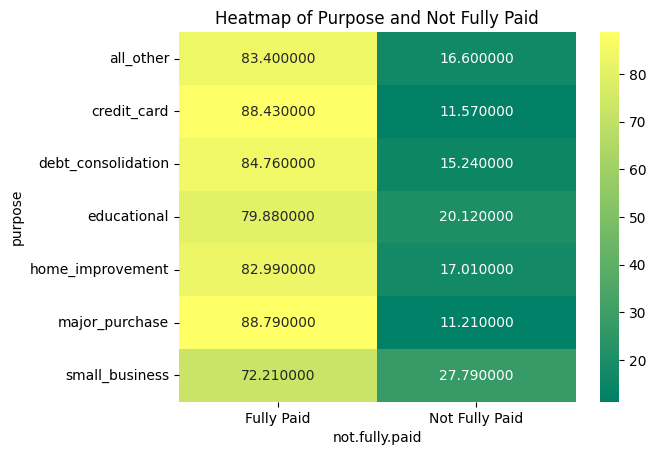

In [106]:


plt.xlabel('purpose')
plt.ylabel('not.fully.paid')
sns.heatmap(grouped_data_percentage, annot=True, fmt='f', cmap='summer')
plt.title('Heatmap of Purpose and Not Fully Paid')
plt.show()

In [108]:


avg_int_rate_for_each_purpose = data.groupby('purpose')['int.rate'].mean().round(3)
print(avg_int_rate_for_each_purpose)


purpose
all_other             0.117
credit_card           0.120
debt_consolidation    0.127
educational           0.120
home_improvement      0.118
major_purchase        0.114
small_business        0.138
Name: int.rate, dtype: float64


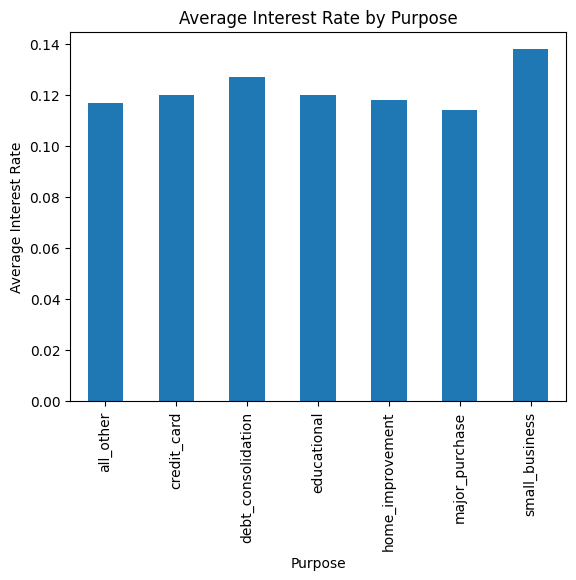

In [119]:
avg_int_rate_for_each_purpose.plot(kind='bar')
plt.title('Average Interest Rate by Purpose')
plt.xlabel('Purpose')
plt.ylabel('Average Interest Rate')
plt.show()



The interest rate of small bussiness is significanly high. this show the positive correlation between interest rate and the risk.

In [134]:

average_interest_rate=data['int.rate'].mean().round(4)
print(average_interest_rate)

average_interest_rate_not_fully_paid = data[data['not.fully.paid'] == 'Not Fully Paid']['int.rate'].mean().round(4)

average_interest_rate_fully_paid = data[data['not.fully.paid'] == 'Fully Paid']['int.rate'].mean().round(4)
print(f"Average interest rate for not fully paid loans: {average_interest_rate_not_fully_paid}")
print(f"Average interest rate for fully paid loans: {average_interest_rate_fully_paid}")


0.1226
Average interest rate for not fully paid loans: 0.1325
Average interest rate for fully paid loans: 0.1208


percentage difference of interest rate that is fully paid back in comparision to that which is not paid back

In [111]:
# prompt: percentage difference between fully paid interest rate and not fully paid interest rate

percentage_difference = (average_interest_rate_not_fully_paid - average_interest_rate_fully_paid) / average_interest_rate_fully_paid * 100
print(f"Percentage difference between fully paid and not fully paid interest rates: {percentage_difference:.2f}%")


Percentage difference between fully paid and not fully paid interest rates: 9.69%


the interest rate for those who have fully paid is slighly lower than the average interest rate but the interest rate of those who have not fully paid is much higher than the average interest rate

In [138]:
corellation_revol_util_and_int_rate=data['revol.util'].corr(data['int.rate'])
print(corellation_revol_util_and_int_rate)

0.46483727949435294


these is a moderate corellation between revol.util and the interest rate.
lets seee in the scatterd plot

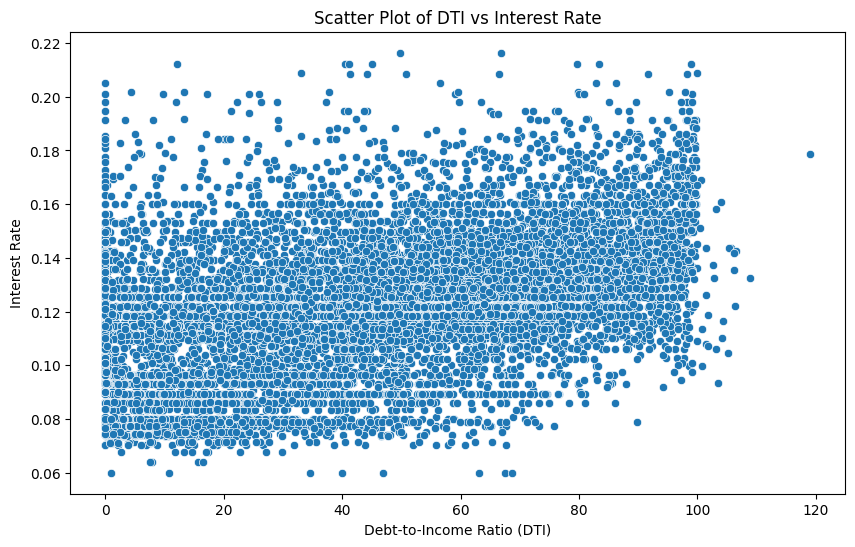

In [92]:
# prompt: plot the chart above

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="revol.util", y="int.rate")
plt.xlabel("Debt-to-Income Ratio (DTI)")
plt.ylabel("Interest Rate")
plt.title("Scatter Plot of DTI vs Interest Rate")
plt.show()


In [98]:
data_with_fully_paid=data[data['not.fully.paid']=='Fully Paid']
data_with_not_fully_paid=data[data['not.fully.paid']=='Not Fully Paid']
fico_for_fully_paid=data_with_fully_paid['fico'].mean()
fico_for_not_fully_paid=data_with_not_fully_paid['fico'].mean()
print(f"Average FICO score for fully paid loans: {fico_for_fully_paid:.2f}")
print(f"Average FICO score for not fully paid loans: {fico_for_not_fully_paid:.2f}")

dti_for_fully_paid=data_with_fully_paid['dti'].mean()
dti_for_not_fully_paid=data_with_not_fully_paid['dti'].mean()
print(f"Average DTI score for fully paid loans: {dti_for_fully_paid:.2f}")
print(f"Average DTI score for not fully paid loans: {dti_for_not_fully_paid:.2f}")

Average FICO score for fully paid loans: 713.33
Average FICO score for not fully paid loans: 697.83
Average DTI score for fully paid loans: 12.49
Average DTI score for not fully paid loans: 13.20


borrowers with higher FICO score are more likely to pay the loan and vice versa.
similarly, the higher DTI score also suggest the risk